In [1]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from pathlib import Path

# Conectar MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

# Leer datos desde MongoDB
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

print("✅ Datos cargados:", len(df))
df.head()


✅ Datos cargados: 3000


,id_paciente,nombre,edad,sexo,distrito,servicio,fecha_atencion,monto
0,P0001,Ana García,4,No especificado,Miraflores,Medicina General,2022-12-13,202.67
1,P0002,Ana Gómez,38,M,Lima,Dermatología,2021-06-21,164.91
2,P0003,Pedro Rojas,44,No especificado,No registrado,Oncología,2021-07-02,380.36
3,P0004,José Pérez,76,M,Lima,Cardiología,2022-09-02,76.72
4,P0005,José Rojas,3,F,Lima,Cardiología,2022-03-24,171.91


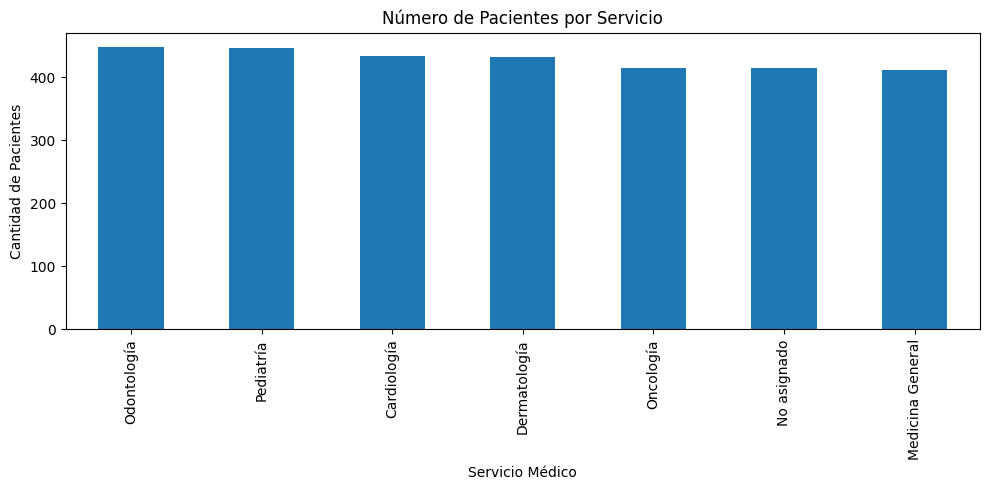

In [2]:
plt.figure(figsize=(10,5))
df["servicio"].value_counts().plot(kind="bar")
plt.title("Número de Pacientes por Servicio")
plt.xlabel("Servicio Médico")
plt.ylabel("Cantidad de Pacientes")
plt.tight_layout()

reports_path = Path.cwd().parent / "reports"
reports_path.mkdir(exist_ok=True)
plt.savefig(reports_path / "pacientes_por_servicio.png")
plt.show()


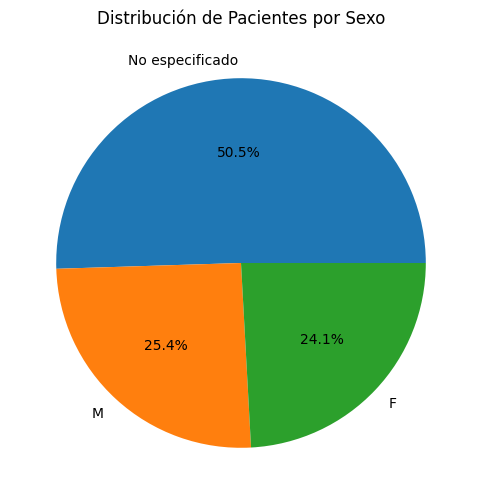

In [3]:
plt.figure(figsize=(6,6))
df["sexo"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribución de Pacientes por Sexo")
plt.ylabel("")
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()


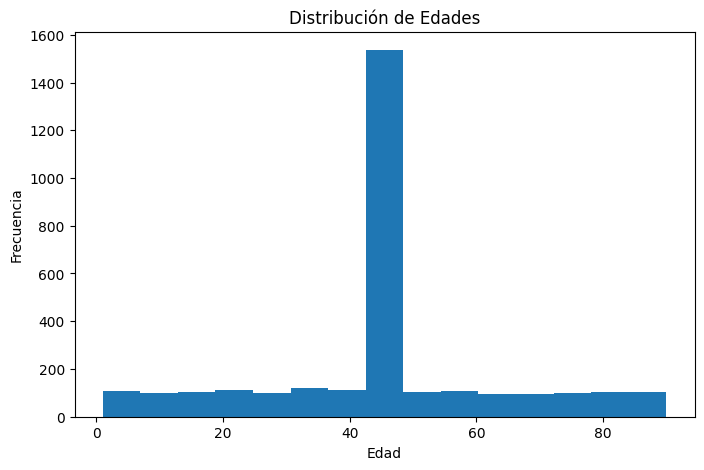

In [4]:
plt.figure(figsize=(8,5))
df["edad"].plot(kind="hist", bins=15)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.savefig(reports_path / "histograma_edades.png")
plt.show()


In [5]:
promedio_montos = df.groupby("distrito")["monto"].mean().sort_values(ascending=False)
print("💰 Promedio de monto por distrito:")
print(promedio_montos)

promedio_montos.to_csv(reports_path / "promedio_montos_distrito.csv")


💰 Promedio de monto por distrito:
distrito
Surco            288.449365
Comas            281.874651
Miraflores       277.968670
Lima             274.876643
Los Olivos       274.670228
San Isidro       269.832219
No registrado    265.993861
Callao           265.772061
Name: monto, dtype: float64
